## MLPをkerasでやってみよう

In [28]:
from __future__ import print_function
import numpy as np
np.random.seed(20170214)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.utils import np_utils
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn

%matplotlib inline

In [22]:
batch_size = 128
nb_classes = 10
nb_epoch = 20

学習にはMNISTのデータを使うので、読み込みましょう。

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [5]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [6]:
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
activation_2 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
__________

In [8]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [23]:
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, nb_epoch=nb_epoch,
                    verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 1024/60000 [..............................] - ETA: 9s - loss: 0.0405 - acc: 0.9863 

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


60000/60000 [==============================] - 7s 120us/step - loss: 0.0397 - acc: 0.9880 - val_loss: 0.0759 - val_acc: 0.9814
Epoch 2/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0338 - acc: 0.9899 - val_loss: 0.0774 - val_acc: 0.9833
Epoch 3/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0303 - acc: 0.9909 - val_loss: 0.0918 - val_acc: 0.9827
Epoch 4/20
60000/60000 [==============================] - 5s 87us/step - loss: 0.0302 - acc: 0.9916 - val_loss: 0.0807 - val_acc: 0.9848
Epoch 5/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0257 - acc: 0.9929 - val_loss: 0.0956 - val_acc: 0.9835
Epoch 6/20
60000/60000 [==============================] - 5s 85us/step - loss: 0.0241 - acc: 0.9929 - val_loss: 0.0986 - val_acc: 0.9819
Epoch 7/20
60000/60000 [==============================] - 5s 84us/step - loss: 0.0234 - acc: 0.9936 - val_loss: 0.0943 - val_acc: 0.9829
Epoch 8/20
60000/60000 [===========================

In [24]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.1246892454990957
Test accuracy: 0.9817


### 学習した結果を分かりやすく可視化してみる
今回の学習結果を数字だけでなく、グラフで表示してみましょう。

今回は、学習曲線とconfusion matrixを描画してみます。

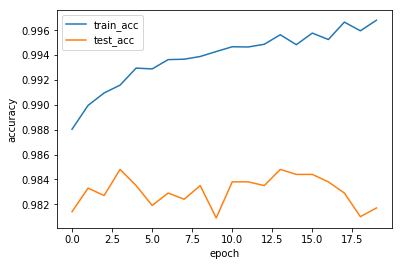

In [25]:
plt.plot(history.history['acc'], label='train_acc')
plt.plot(history.history['val_acc'], label='test_acc')

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.clf()

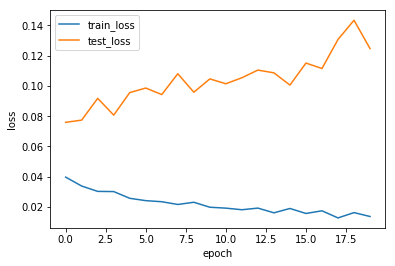

In [26]:
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='test_loss')

plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()
plt.clf()

In [40]:
pred = model.predict(X_test)
pred_result = []
for i in pred:
    pred_result.append(i.argmax())

In [48]:
def print_cmx(y_true, y_pred):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cmx, annot=True, cmap='Greens')
    plt.show()

[7 2 1 ... 4 5 6]
[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 

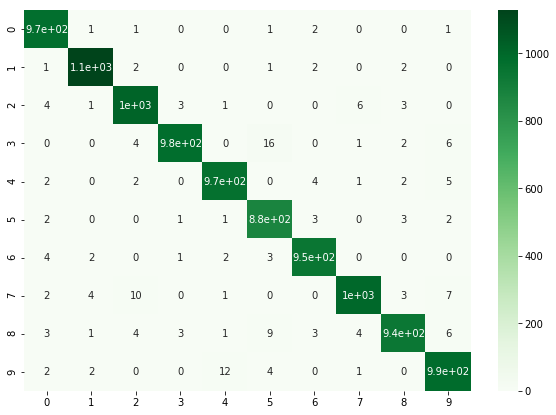

In [50]:
print(y_test)
print(pred_result)
print_cmx(y_test, pred_result)